# 1.**Author**

ECS708P mini-project submission

Sanjay Ramesh

Student ID: 210811700

# **2 Problem formulation**
Here I am trying to address the issue of improving the accuracy & efficiency of our predictive model by trying various other machine learning classifiers and also experiment deep learning methodolgy inorder to check if it increases the predictive efficiency and proceed towards finding the best model.

In [38]:
path = '/content/drive/MyDrive/Data/set'
os.listdir(path)

['S125_hum_2_Potter.wav',
 'S158_hum_2_StarWars.wav',
 'S103_hum_2_StarWars.wav',
 'S54_hum_2_StarWars.wav',
 'S25_hum_3_StarWars.wav',
 'S40_hum_2_potter.wav',
 'S177_hum_3_StarWars.wav',
 'S144_hum_2_StarWars.wav',
 'S124_Whistle_2_Potter.wav',
 'S173_whistle_2_Potter.wav',
 'S19_hum_3_StarWars.wav',
 'S158_whistle_2_StarWars.wav',
 'S1_whistle_2_StarWars.wav',
 'S120_whistle_2_StarWars.wav',
 'S184_whistle_2_Potter.wav',
 'S124_Whistle_2_StarWars.wav',
 'S101_hum_4_StarWars.wav',
 'S165_whistle_2_Potter.wav',
 'S29_hum_2_StarWars.wav',
 'S202_hum_3_Starwars.wav',
 'S117_whistle_2_StarWars.wav',
 'S169_hum_2_Potter.wav',
 'S159_whistle_2_Potter.wav',
 'S135_hum_2_StarWars.wav',
 'S217_hum_2_StarWars.wav',
 'S8_hum_3_[StarWars].wav',
 'S65_hum_1_Potter.wav',
 'S200_hum_2_StarWars.wav',
 'S111_hum_1_Potter.wav',
 'S44_hum_2_StarWars.wav',
 'S141_whistle_2_Potter.wav',
 'S99_hum_2_[StarWars].wav',
 'S202_hum_2_Potter.wav',
 'S201_hum_2_Potter.wav',
 'S209_whistle_2_StarWars.wav',
 'S214

In [21]:
sample_path = '/content/drive/MyDrive/Data/set/*.wav'
files = glob.glob(sample_path)
len(files) # length of the files

817

In [22]:
from google.colab import drive

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import os, sys, re, pickle, glob
import urllib.request
import zipfile

import IPython.display as ipd
from tqdm import tqdm
import librosa

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [23]:
for file in files:
  print(file.split('/')[-1])  # printing file names

S125_hum_2_Potter.wav
S158_hum_2_StarWars.wav
S103_hum_2_StarWars.wav
S54_hum_2_StarWars.wav
S25_hum_3_StarWars.wav
S40_hum_2_potter.wav
S177_hum_3_StarWars.wav
S144_hum_2_StarWars.wav
S124_Whistle_2_Potter.wav
S173_whistle_2_Potter.wav
S19_hum_3_StarWars.wav
S158_whistle_2_StarWars.wav
S1_whistle_2_StarWars.wav
S120_whistle_2_StarWars.wav
S184_whistle_2_Potter.wav
S124_Whistle_2_StarWars.wav
S101_hum_4_StarWars.wav
S165_whistle_2_Potter.wav
S29_hum_2_StarWars.wav
S202_hum_3_Starwars.wav
S117_whistle_2_StarWars.wav
S169_hum_2_Potter.wav
S159_whistle_2_Potter.wav
S135_hum_2_StarWars.wav
S217_hum_2_StarWars.wav
S8_hum_3_[StarWars].wav
S65_hum_1_Potter.wav
S200_hum_2_StarWars.wav
S111_hum_1_Potter.wav
S44_hum_2_StarWars.wav
S141_whistle_2_Potter.wav
S99_hum_2_[StarWars].wav
S202_hum_2_Potter.wav
S201_hum_2_Potter.wav
S209_whistle_2_StarWars.wav
S214_whistle_2_Potter.wav
S17_hum_2_Potter.wav
S163_whistle_2_StarWars.wav
S142_hum_2_Potter.wav
S199_Hum_3_StarWars.wav
S165_hum_2_StarWars.wav
S

In [24]:
print('The full path to the first audio file is: ', files[6])
print('\n')
print('The name of the first audio file is: ', files[6].split('/')[-1])
print('    The participand ID is: ', files[6].split('/')[-1].split('_')[0])
print('    The type of interpretation is: ', files[6].split('/')[-1].split('_')[1])
print('    The interpretation number is: ', files[6].split('/')[-1].split('_')[2])
print('    The song is: ', files[6].split('/')[-1].split('_')[3])

The full path to the first audio file is:  /content/drive/MyDrive/Data/set/S177_hum_3_StarWars.wav


The name of the first audio file is:  S177_hum_3_StarWars.wav
    The participand ID is:  S177
    The type of interpretation is:  hum
    The interpretation number is:  3
    The song is:  StarWars.wav


# **7 Dataset**

we are accessing only the Potter and Starwars audio files for predicting the song name and also showing visualisation of the samples and the other Data cleaning and processing steps have been included below.

In [25]:
MLENDHW_table = [] 
for file in files:
  try:
   file_name = file.split('/')[-1]
   participant_ID = file.split('/')[-1].split('_')[0]
   interpretation_type = file.split('/')[-1].split('_')[1]
   interpretation_number = file.split('/')[-1].split('_')[2]
   song = file.split('/')[-1].split('_')[3].split('.')[0]
   if song =="Potter" or "potter" or "StarWars" or "starwars" or "StarWar" or "imperial march":
    MLENDHW_table.append([file_name,participant_ID,interpretation_type,interpretation_number, song])
  except:
    continue
MLENDHW_table

len(MLENDHW_table)


817

In [26]:
MLENDHW_df = pd.DataFrame(MLENDHW_table,columns=['file_id','participant','interpretation','number','song']).set_index('file_id') 
MLENDHW_df

,participant,interpretation,number,song
file_id,,,,
S125_hum_2_Potter.wav,S125,hum,2,Potter
S158_hum_2_StarWars.wav,S158,hum,2,StarWars
S103_hum_2_StarWars.wav,S103,hum,2,StarWars
S54_hum_2_StarWars.wav,S54,hum,2,StarWars
S25_hum_3_StarWars.wav,S25,hum,3,StarWars
...,...,...,...,...
S38_hum_3_Potter.wav,S38,hum,3,Potter
S180_whistle_1_StarWars.wav,S180,whistle,1,StarWars
S180_whistle_2_StarWars.wav,S180,whistle,2,StarWars


In [27]:
uniqueValues = MLENDHW_df['song'].unique() #printing the unique lables in the dataframe and replacing them with standard values such as Potter and Starwars.
uniqueValues

array(['Potter', 'StarWars', 'potter', 'Starwars', '[StarWars]',
       'Potter ', '[Potter]', '[ Star Wars ]', '[StarWars] ', 'StarsWars',
       '[potter]', 'StartWars', 'star wars', '[Potter] ', 'starwar',
       'Star wars', '[Starwars]', '[STARWARS]', 'Imperial', 'starwars',
       '1', '(starwars)', 'harry potter', '2', '[StatWars]', '(potter)',
       'imperial'], dtype=object)

In [28]:
c= MLENDHW_df.replace({'song' : { "[Potter]" : "Potter" ,"potter" :"Potter", "[potter]":"Potter","Harry":"Potter","[Potter]":"Potter","(potter)":"Potter","Potterwav":"Potter","harry potter":"Potter","Potter ":"Potter","[Potter] ":"Potter",'Starwars':'StarWars','[StarWars]':'StarWars','Imperial':'StarWars','March':'StarWars','[StarWars] ':'StarWars','star':'StarWars','(starwars)':'StarWars','imperial':'StarWars','starwars':'StarWars','[STARWARS]':'StarWars','StartWars':'StarWars','[ Star Wars ]':'StarWars','[StatWars]':'StarWars','1':'StarWars','2':'StarWars','[Starwars]':'StarWars','starwar':'StarWars','StarsWars':'StarWars','Star wars':'StarWars','star wars':'StarWars' }})

In [29]:
uniqueValues = c['song'].unique()
uniqueValues

array(['Potter', 'StarWars'], dtype=object)

In [30]:
c

,participant,interpretation,number,song
file_id,,,,
S125_hum_2_Potter.wav,S125,hum,2,Potter
S158_hum_2_StarWars.wav,S158,hum,2,StarWars
S103_hum_2_StarWars.wav,S103,hum,2,StarWars
S54_hum_2_StarWars.wav,S54,hum,2,StarWars
S25_hum_3_StarWars.wav,S25,hum,3,StarWars
...,...,...,...,...
S38_hum_3_Potter.wav,S38,hum,3,Potter
S180_whistle_1_StarWars.wav,S180,whistle,1,StarWars
S180_whistle_2_StarWars.wav,S180,whistle,2,StarWars


Audio files are complex data types. Specifically they are discrete signals or time series, consisting of values on a 1D grid. These values are known as samples themselves, which might be a bit confusing, as we have used this term to refer to the items in our dataset. The sampling frequency is the rate at which samples in an audio file are produced. For instance a sampling frequency of 5HZ indicates that 5 produce 5 samples per second, or 1 sample every 0.2 s. Let's plot one of our audio signals:

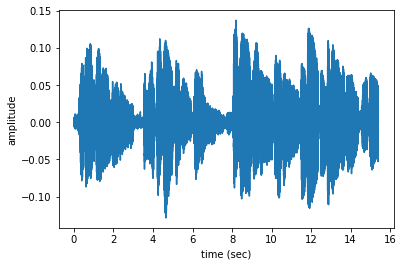

In [31]:
n=0
fs = None # Sampling frequency. If None, fs would be 22050
x, fs = librosa.load(files[n],sr=fs)
t = np.arange(len(x))/fs
plt.plot(t,x)
plt.xlabel('time (sec)')
plt.ylabel('amplitude')
plt.show()
display(ipd.Audio(files[n]))

In [32]:
c.loc[files[n].split('/')[-1]]

participant         S125
interpretation       hum
number                 2
song              Potter
Name: S125_hum_2_Potter.wav, dtype: object

In [33]:
n=0
x, fs = librosa.load(files[n],sr=fs)  # Displaying the number samples of the audio signals
print('This audio signal has', len(x), 'samples')

This audio signal has 679008 samples


# **4 Transformation stage**

Here we are normalising the data and transforming the data with new featurizations.

In [34]:
# Data Normalization
def normalize(x, axis=0):
    return sklearn.preprocessing.minmax_scale(x, axis=axis)

One approach is to extract a few features from our signals and use these features instead as predictors. In the following cell, we define a function that extracts four features from an audio signal, namely: Power. Pitch mean. Pitch standard deviation. Fraction of voiced region. In the next cell, we define a new function that gets the pitch of an audio signal.

In [35]:
def getPitch(x,fs,winLen=0.02):
  #winLen = 0.02 
  p = winLen*fs
  frame_length = int(2**int(p-1).bit_length())
  hop_length = frame_length//2
  f0, voiced_flag, voiced_probs = librosa.pyin(y=x, fmin=80, fmax=450, sr=fs,
                                                 frame_length=frame_length,hop_length=hop_length)
  return f0,voiced_flag

In [36]:
def getXy(files,labels_file, scale_audio=False, onlySingleDigit=False):
  X,y =[],[]
  for file in tqdm(files):
    fileID = file.split('/')[-1]
    file_name = file.split('/')[-1]
    yi = labels_file.loc[fileID]['song']=='Potter'

    fs = None # if None, fs would be 22050
    x, fs = librosa.load(file,sr=fs)
    if scale_audio: x = x/np.max(np.abs(x))
    f0, voiced_flag = getPitch(x,fs,winLen=0.02)
      
    power = np.sum(x**2)/len(x)
    pitch_mean = np.nanmean(f0) if np.mean(np.isnan(f0))<1 else 0
    pitch_std  = np.nanstd(f0) if np.mean(np.isnan(f0))<1 else 0
    voiced_fr = np.mean(voiced_flag)

    xi = [power,pitch_mean,pitch_std,voiced_fr]
    X.append(xi)
    y.append(yi)

  return np.array(X),np.array(y)

# **3 Machine Learning pipeline**

Model to predict the songs taking audio data as input and song name as output.
Let's apply getXy to the subsample and obtain the NumPy predictor array (X) and a binary label (y).

In [77]:
X,y = getXy(files, labels_file=c, scale_audio=True, onlySingleDigit=True)

100%|██████████| 817/817 [38:14<00:00,  2.81s/it]


The next cell shows the shape of X and y and prints the labels vector y:

In [78]:
print('The shape of X is', X.shape) 
print('The shape of y is', y.shape)
print('The labels vector is', y)


The shape of X is (817, 4)
The shape of y is (817,)
The labels vector is [ True False False False False  True False False  True  True False False
 False False  True False False  True False False False  True  True False
 False False  True False  True False  True False  True  True False  True
  True False  True False False  True  True False  True False  True  True
  True False  True False False  True  True False  True False False  True
 False  True  True False False  True  True  True  True  True  True  True
 False False False False  True  True False  True  True  True  True  True
  True  True False  True False False False  True  True  True  True False
  True False False  True False False False  True False  True  True False
 False  True False  True  True False  True  True False False  True  True
 False  True  True False False False  True  True False  True False  True
 False False False  True False False  True  True  True False False False
 False False False False False False  True False  T

# **Checking if our data set is balanced**

In [79]:
print(' The number of potter recordings is ', np.count_nonzero(y))
print(' The number of starwars recordings is ', y.size - np.count_nonzero(y))

 The number of potter recordings is  407
 The number of starwars recordings is  410


Finally, to be on the cautious side, let's eliminate any potential item with a NaN (not a number).

In [80]:
# If nan sample, remove them
if np.sum(np.isnan(X)):
  idx = np.isnan(X).sum(1)>0
  X = X[~idx]
  y = y[~idx]
print(np.sum(np.isnan(X)))

0


# **5 Modeling:**
Splitting the data to 80-20. 80% training 20 % testing We will use various models like Adaboost classifier , Decision tree , Random forest classifier , Quadratic discriminant analysis , K neigbors classifier , Gaussian NB and display and compare the accuracy side by side.

In [81]:
from sklearn import svm
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X,y,test_size=0.3)
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((571, 4), (246, 4), (571,), (246,))

# **6 Methodology**

Fitting all our models and Showing Result of Accuracy and also our model performance is based on the accuracy , the higher the accuracy the better our model is performing and also we can plot the confusion matrix for our model to know the number of correct and incorrect identifications like true postivies , true negatives ,false postives,and false negatives.

In [82]:
model  = svm.SVC(C=1)          # printing accuracy for SVM
model.fit(X_train,y_train)

yt_p = model.predict(X_train)
yv_p = model.predict(X_val)

print('Training Accuracy', np.mean(yt_p==y_train))
print('Validation  Accuracy', np.mean(yv_p==y_val))
print('The support vectors are', model.support_vectors_.shape)

Training Accuracy 0.5761821366024519
Validation  Accuracy 0.5487804878048781
The support vectors are (536, 4)


In [84]:
# Observation: Increasing the training and validation accuracy
mean = X_train.mean(0)
sd =  X_train.std(0)

X_train = (X_train-mean)/sd
X_val  = (X_val-mean)/sd

model  = svm.SVC(C=1,gamma=2)
model.fit(X_train,y_train)

yt_p = model.predict(X_train)
yv_p = model.predict(X_val)

print('Training Accuracy', np.mean(yt_p==y_train))
print('Validation  Accuracy', np.mean(yv_p==y_val))
print('The support vectors are', model.support_vectors_.shape)

Training Accuracy 0.7793345008756567
Validation  Accuracy 0.6504065040650406
The support vectors are (478, 4)


# **Now we are implementing all other models for our advanced solution**

In [85]:
mean = X_train.mean(0)

sd =  X_train.std(0)


from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC


X_train = (X_train-mean)/sd
X_val  = (X_val-mean)/sd

classification_models = [
                         GaussianNB(),
                         DecisionTreeClassifier(),
                         KNeighborsClassifier(),
                         RandomForestClassifier(),
                         SVC(kernel='rbf'),
                         AdaBoostClassifier(),
                         QuadraticDiscriminantAnalysis()
]
scores = []
for model in classification_models:
  model.fit(X_train,y_train)
  score=model.score(X_val,y_val)
  model_name=type(model).__name__
  if model_name=='SVC' and model.kernel=='rbf': model_name='RBF kernel'
  scores.append((model_name,(f'{100*score:.2f}%')))
scores_df = pd.DataFrame(scores,columns=['Classifier','Accuracy Score'])
scores_df.sort_values(by = 'Accuracy Score',axis = 0, ascending = False)

,Classifier,Accuracy Score
5,AdaBoostClassifier,67.07%
4,RBF kernel,63.82%
2,KNeighborsClassifier,62.20%
3,RandomForestClassifier,61.38%
1,DecisionTreeClassifier,57.32%
0,GaussianNB,56.91%
6,QuadraticDiscriminantAnalysis,55.28%


**Observations:** It is observed that AdaBoostClassifier has the better validation accuracy among all the models.

# **8 Results**

Now we are expirimenting our results after crossvalidation and grid search CV and checking if our model accuracy has been increased.
Using Cross_validation to compare accuracy

In [86]:
from sklearn.model_selection import cross_validate

In [88]:
list1 = []
list2 = []
for model in classification_models:
  cv_results = cross_validate(model, X, y, cv=10)
  model_name=type(model).__name__
  print(model_name)
  #print(cv_results['test_score'])
  a = np.average(cv_results['test_score'])
  list1.append(model_name)
  list2.append(a)
  print(a)
df_crossvalidate = pd.DataFrame(data = list2,index = list1,columns=['Accuracy'] )
a = df_crossvalidate.sort_values(by = 'Accuracy',axis = 0, ascending = False)
display(a)

GaussianNB
0.5030261969286359
DecisionTreeClassifier
0.576513098464318
KNeighborsClassifier
0.6400782896717857
RandomForestClassifier
0.6500451671183379
SVC
0.570385426076483
AdaBoostClassifier
0.6549232158988255
QuadraticDiscriminantAnalysis
0.5030864197530864


,Accuracy
AdaBoostClassifier,0.654923
RandomForestClassifier,0.650045
KNeighborsClassifier,0.640078
DecisionTreeClassifier,0.576513
SVC,0.570385
QuadraticDiscriminantAnalysis,0.503086
GaussianNB,0.503026


# **Observation:** After 10 fold crossvalidation we can see that the accuracy has been considerably increased for many models.

# **Grid Search CV**
This section focuses on:
Finding the best value of C and gamma value for our SVC Model
Creating a Confusion Matrix
Plotting a heatmap
Classification Report

In [89]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
import seaborn as sn

# Defining the C value, Gamma and kernel
param_grid = { 'C':[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1,2,3,4,5,6,7,8,9,10,11],'kernel': ['rbf'],'gamma':[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1,2,3,4,5,6,7]}
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=2)
grid.fit(X_train,y_train)

# Printing the best parameter value
print("Best Parameter Value: \n\n", grid.best_params_)
grid_predictions=grid.predict(X_val)



Fitting 5 folds for each of 320 candidates, totalling 1600 fits
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.2, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.2, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.2, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.2, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.2, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.3, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=

# **Observations: Having C = 1 & Gama = 2 gives the best value**

Now lets print confusion matrix and classification report

              precision    recall  f1-score   support

       False       0.61      0.72      0.66       115
        True       0.71      0.59      0.64       131

    accuracy                           0.65       246
   macro avg       0.66      0.65      0.65       246
weighted avg       0.66      0.65      0.65       246



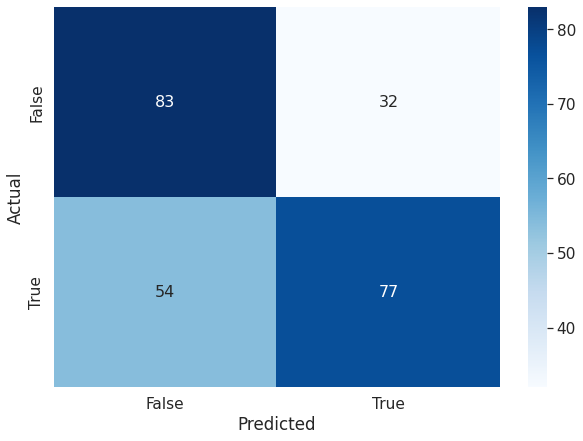

In [90]:
# Printing the confusion matrix
con_mat = confusion_matrix(y_val,grid_predictions)

# Printing the Classification Report
print(classification_report(y_val,grid_predictions))
df_cm = pd.DataFrame(con_mat, columns=np.unique(y_val), index = np.unique(y_val))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (10,7))
sn.set(font_scale=1.4)#for label size
sn.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 16})# font size

Now let us expiriment by trying to Comparing Results for the best value of C and Gama
For different values of C in SVC with gamma = 2
Use widget to display all different results in different tabs.
Also plotting the training & validation accuracy.

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Training Accuracy 0.6672504378283712
Validation  Accuracy 0.6138211382113821
Confusion matrix for Training:
 [[259  36]
 [154 122]]

Confusion matrix for Validation:
 [[104  11]
 [ 84  47]]

Normalised confusion matrix for Training:
 [[0.8779661  0.1220339 ]
 [0.55797101 0.44202899]]

Normalised confusion matrix for Validation :
 [[0.90434783 0.09565217]
 [0.64122137 0.35877863]]



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Training Accuracy 0.7478108581436077
Validation  Accuracy 0.6260162601626016
Confusion matrix for Training:
 [[223  72]
 [ 72 204]]

Confusion matrix for Validation:
 [[77 38]
 [54 77]]

Normalised confusion matrix for Training:
 [[0.7559322  0.2440678 ]
 [0.26086957 0.73913043]]

Normalised confusion matrix for Validation :
 [[0.66956522 0.33043478]
 [0.41221374 0.58778626]]



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Training Accuracy 0.7495621716287215
Validation  Accuracy 0.6382113821138211
Confusion matrix for Training:
 [[223  72]
 [ 71 205]]

Confusion matrix for Validation:
 [[80 35]
 [54 77]]

Normalised confusion matrix for Training:
 [[0.7559322  0.2440678 ]
 [0.25724638 0.74275362]]

Normalised confusion matrix for Validation :
 [[0.69565217 0.30434783]
 [0.41221374 0.58778626]]



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Training Accuracy 0.7513134851138353
Validation  Accuracy 0.6382113821138211
Confusion matrix for Training:
 [[225  70]
 [ 72 204]]

Confusion matrix for Validation:
 [[79 36]
 [53 78]]

Normalised confusion matrix for Training:
 [[0.76271186 0.23728814]
 [0.26086957 0.73913043]]

Normalised confusion matrix for Validation :
 [[0.68695652 0.31304348]
 [0.40458015 0.59541985]]



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Training Accuracy 0.7600700525394045
Validation  Accuracy 0.6422764227642277
Confusion matrix for Training:
 [[226  69]
 [ 68 208]]

Confusion matrix for Validation:
 [[80 35]
 [53 78]]

Normalised confusion matrix for Training:
 [[0.76610169 0.23389831]
 [0.24637681 0.75362319]]

Normalised confusion matrix for Validation :
 [[0.69565217 0.30434783]
 [0.40458015 0.59541985]]



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Training Accuracy 0.7635726795096323
Validation  Accuracy 0.6422764227642277
Confusion matrix for Training:
 [[228  67]
 [ 68 208]]

Confusion matrix for Validation:
 [[79 36]
 [52 79]]

Normalised confusion matrix for Training:
 [[0.77288136 0.22711864]
 [0.24637681 0.75362319]]

Normalised confusion matrix for Validation :
 [[0.68695652 0.31304348]
 [0.39694656 0.60305344]]



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Training Accuracy 0.7688266199649737
Validation  Accuracy 0.6463414634146342
Confusion matrix for Training:
 [[229  66]
 [ 66 210]]

Confusion matrix for Validation:
 [[80 35]
 [52 79]]

Normalised confusion matrix for Training:
 [[0.77627119 0.22372881]
 [0.23913043 0.76086957]]

Normalised confusion matrix for Validation :
 [[0.69565217 0.30434783]
 [0.39694656 0.60305344]]



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Training Accuracy 0.7723292469352014
Validation  Accuracy 0.6504065040650406
Confusion matrix for Training:
 [[230  65]
 [ 65 211]]

Confusion matrix for Validation:
 [[81 34]
 [52 79]]

Normalised confusion matrix for Training:
 [[0.77966102 0.22033898]
 [0.23550725 0.76449275]]

Normalised confusion matrix for Validation :
 [[0.70434783 0.29565217]
 [0.39694656 0.60305344]]



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Training Accuracy 0.7775831873905429
Validation  Accuracy 0.6504065040650406
Confusion matrix for Training:
 [[230  65]
 [ 62 214]]

Confusion matrix for Validation:
 [[83 32]
 [54 77]]

Normalised confusion matrix for Training:
 [[0.77966102 0.22033898]
 [0.22463768 0.77536232]]

Normalised confusion matrix for Validation :
 [[0.72173913 0.27826087]
 [0.41221374 0.58778626]]



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Training Accuracy 0.7793345008756567
Validation  Accuracy 0.6504065040650406
Confusion matrix for Training:
 [[230  65]
 [ 61 215]]

Confusion matrix for Validation:
 [[83 32]
 [54 77]]

Normalised confusion matrix for Training:
 [[0.77966102 0.22033898]
 [0.22101449 0.77898551]]

Normalised confusion matrix for Validation :
 [[0.72173913 0.27826087]
 [0.41221374 0.58778626]]



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Training Accuracy 0.8056042031523643
Validation  Accuracy 0.6504065040650406
Confusion matrix for Training:
 [[233  62]
 [ 49 227]]

Confusion matrix for Validation:
 [[80 35]
 [51 80]]

Normalised confusion matrix for Training:
 [[0.78983051 0.21016949]
 [0.17753623 0.82246377]]

Normalised confusion matrix for Validation :
 [[0.69565217 0.30434783]
 [0.38931298 0.61068702]]



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Training Accuracy 0.819614711033275
Validation  Accuracy 0.6422764227642277
Confusion matrix for Training:
 [[234  61]
 [ 42 234]]

Confusion matrix for Validation:
 [[75 40]
 [48 83]]

Normalised confusion matrix for Training:
 [[0.79322034 0.20677966]
 [0.15217391 0.84782609]]

Normalised confusion matrix for Validation :
 [[0.65217391 0.34782609]
 [0.36641221 0.63358779]]



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Training Accuracy 0.840630472854641
Validation  Accuracy 0.6422764227642277
Confusion matrix for Training:
 [[243  52]
 [ 39 237]]

Confusion matrix for Validation:
 [[77 38]
 [50 81]]

Normalised confusion matrix for Training:
 [[0.82372881 0.17627119]
 [0.14130435 0.85869565]]

Normalised confusion matrix for Validation :
 [[0.66956522 0.33043478]
 [0.38167939 0.61832061]]



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Training Accuracy 0.8809106830122592
Validation  Accuracy 0.6178861788617886
Confusion matrix for Training:
 [[258  37]
 [ 31 245]]

Confusion matrix for Validation:
 [[73 42]
 [52 79]]

Normalised confusion matrix for Training:
 [[0.87457627 0.12542373]
 [0.11231884 0.88768116]]

Normalised confusion matrix for Validation :
 [[0.63478261 0.36521739]
 [0.39694656 0.60305344]]



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Training Accuracy 0.9071803852889667
Validation  Accuracy 0.5853658536585366
Confusion matrix for Training:
 [[265  30]
 [ 23 253]]

Confusion matrix for Validation:
 [[70 45]
 [57 74]]

Normalised confusion matrix for Training:
 [[0.89830508 0.10169492]
 [0.08333333 0.91666667]]

Normalised confusion matrix for Validation :
 [[0.60869565 0.39130435]
 [0.4351145  0.5648855 ]]



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Training Accuracy 0.9299474605954466
Validation  Accuracy 0.5853658536585366
Confusion matrix for Training:
 [[273  22]
 [ 18 258]]

Confusion matrix for Validation:
 [[68 47]
 [55 76]]

Normalised confusion matrix for Training:
 [[0.92542373 0.07457627]
 [0.06521739 0.93478261]]

Normalised confusion matrix for Validation :
 [[0.59130435 0.40869565]
 [0.41984733 0.58015267]]



<IPython.core.display.Javascript object>

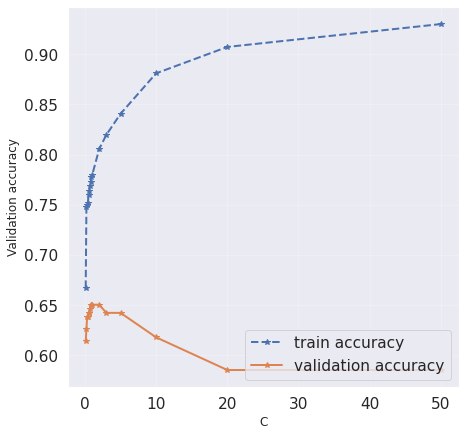

In [96]:
from google.colab import widgets
from sklearn.metrics import confusion_matrix

# Standardization
mean = X_train.mean(0)
sd =  X_train.std(0)
X_train = (X_train-mean)/sd
X_val  = (X_val-mean)/sd
C_values =[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1,2,3,5,10,20,50]

# Initialize tabs
tb = widgets.TabBar([str(C) for C in C_values])

accuracy = dict.fromkeys(C_values)
train_accuracy = dict.fromkeys(C_values)
for C in C_values:
  with tb.output_to(str(C), select= (C < 1)):

    # Model Training
    model  = svm.SVC(kernel='rbf',C=float(C),gamma=2)
    model.fit(X_train,y_train)
    
    # Predict using the model for both training and validation data
    yt_p = model.predict(X_train)
    yv_p = model.predict(X_val)
    print('Training Accuracy', np.mean(yt_p==y_train))
    print('Validation  Accuracy', np.mean(yv_p==y_val))
    accuracy[C] = np.mean(yv_p==y_val)
    train_accuracy[C] = np.mean(yt_p==y_train)
    
    # Generating the confusion matrix    
    trainMatrix = confusion_matrix(y_true=y_train, y_pred=yt_p)
    trainMatrix_nor = trainMatrix.astype('float') / trainMatrix.sum(axis=1)[:, np.newaxis]
    valMatrix = confusion_matrix(y_true=y_val, y_pred=yv_p)
    valMatrix_nor = valMatrix.astype('float') / valMatrix.sum(axis=1)[:, np.newaxis]

    print('Confusion matrix for Training:\n {}\n'.format(trainMatrix))
    print('Confusion matrix for Validation:\n {}\n'.format(valMatrix))

    print('Normalised confusion matrix for Training:\n {}\n'.format(trainMatrix_nor))
    print('Normalised confusion matrix for Validation :\n {}\n'.format(valMatrix_nor))

# Here we predict the value of the validation accuracy as a function of C
plt.figure(figsize=(7, 7))
plt.plot(C_values , list(train_accuracy.values()),'--*',label = 'train accuracy', linewidth=2)
plt.plot(C_values, list(accuracy.values()),'-*',label = 'validation accuracy', linewidth=2)
plt.xlabel("C", fontsize=12)
plt.ylabel("Validation accuracy", fontsize=12)
plt.grid(alpha=0.2)
plt.legend(loc="lower right")
plt.show()

Observations: Parameter values with C=0.9 and gamma=2 giving the best result
Confusion Matrix: SVM gave us the best model with gamma = 2 and C = 0.9 giving an the best accuracy among all the models.

# **Deep Learning experiment**

Now i have tried a new method for feature extraction called as mel frequency cepstral coefficients and implemented a deep learning model to see if we get a better accuracy.


In [97]:
def features_extractor(MLENDHW_df):
    audio, sample_rate = librosa.load(file_name, res_type='kaiser_fast') 
    mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
    mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)
    
    return mfccs_scaled_features

In [98]:
audio_dataset_path='/content/drive/MyDrive/Data/set/'
metadata=MLENDHW_df
metadata.head()

,participant,interpretation,number,song
file_id,,,,
S125_hum_2_Potter.wav,S125,hum,2,Potter
S158_hum_2_StarWars.wav,S158,hum,2,StarWars
S103_hum_2_StarWars.wav,S103,hum,2,StarWars
S54_hum_2_StarWars.wav,S54,hum,2,StarWars
S25_hum_3_StarWars.wav,S25,hum,3,StarWars


In [99]:
import numpy as np
from tqdm import tqdm
### Now we iterate through every audio file and extract features 
### using Mel-Frequency Cepstral Coefficients
extracted_features=[]
for index_num,row in tqdm(metadata.iterrows()):
    file_name = os.path.join(os.path.abspath(audio_dataset_path)+'/'+str(row["participant"]+"_"+str(row["interpretation"])+'_'+str(row["number"])+'_'+str(row["song"])+'.wav'))
    final_class_labels=row["song"]
    data=features_extractor('file_name')
    extracted_features.append([data,final_class_labels])

817it [03:35,  3.79it/s]


In [50]:
### converting extracted_features to Pandas dataframe
extracted_features_df=pd.DataFrame(extracted_features,columns=['feature','class'])
extracted_features_df.head()

,feature,class
0,"[-433.57172, 134.73671, 25.300282, 38.10625, 2...",Potter
1,"[-437.312, 82.63934, 9.626921, 45.08418, 14.60...",StarWars
2,"[-440.6162, 80.55185, 0.2591284, 45.7366, -6.3...",StarWars
3,"[-324.334, 115.311905, 2.8409262, 34.76255, 20...",StarWars
4,"[-420.6928, 99.78694, -7.3049154, 28.627085, 0...",StarWars


In [51]:
### Split the dataset into independent and dependent dataset
X=np.array(extracted_features_df['feature'].tolist())
y=np.array(c['song'].tolist())

In [52]:
X.shape

(817, 40)

In [53]:
y

array(['Potter', 'StarWars', 'StarWars', 'StarWars', 'StarWars', 'Potter',
       'StarWars', 'StarWars', 'Potter', 'Potter', 'StarWars', 'StarWars',
       'StarWars', 'StarWars', 'Potter', 'StarWars', 'StarWars', 'Potter',
       'StarWars', 'StarWars', 'StarWars', 'Potter', 'Potter', 'StarWars',
       'StarWars', 'StarWars', 'Potter', 'StarWars', 'Potter', 'StarWars',
       'Potter', 'StarWars', 'Potter', 'Potter', 'StarWars', 'Potter',
       'Potter', 'StarWars', 'Potter', 'StarWars', 'StarWars', 'Potter',
       'Potter', 'StarWars', 'Potter', 'StarWars', 'Potter', 'Potter',
       'Potter', 'StarWars', 'Potter', 'StarWars', 'StarWars', 'Potter',
       'Potter', 'StarWars', 'Potter', 'StarWars', 'StarWars', 'Potter',
       'StarWars', 'Potter', 'Potter', 'StarWars', 'StarWars', 'Potter',
       'Potter', 'Potter', 'Potter', 'Potter', 'Potter', 'Potter',
       'StarWars', 'StarWars', 'StarWars', 'StarWars', 'Potter', 'Potter',
       'StarWars', 'Potter', 'Potter', 'Potter', 

In [54]:
### Label Encoding
###y=np.array(pd.get_dummies(y))
### Label Encoder
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
y=to_categorical(labelencoder.fit_transform(y))

In [55]:
### Train Test Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [56]:
#Model Creation

In [57]:
import tensorflow as tf
print(tf.__version__)

2.7.0


In [58]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten
from tensorflow.keras.optimizers import Adam
from sklearn import metrics

In [59]:
### No of classes
num_labels=y.shape[1]

In [60]:
model=Sequential()
###first layer
model.add(Dense(100,input_shape=(40,)))
model.add(Activation('relu'))
model.add(Dropout(0.5))
###second layer
model.add(Dense(200))
model.add(Activation('relu'))
model.add(Dropout(0.5))
###third layer
model.add(Dense(100))
model.add(Activation('relu'))
model.add(Dropout(0.5))

###final layer
model.add(Dense(num_labels))
model.add(Activation('softmax'))

In [61]:
model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='adam')

In [62]:
## Trianing my model
from tensorflow.keras.callbacks import ModelCheckpoint
from datetime import datetime 

num_epochs = 100
num_batch_size = 32

checkpointer = ModelCheckpoint(filepath='saved_models/audio_classification.hdf5', 
                               verbose=1, save_best_only=True)
start = datetime.now()

model.fit(X_train, y_train, batch_size=num_batch_size, epochs=num_epochs, validation_data=(X_test, y_test), callbacks=[checkpointer], verbose=1)


duration = datetime.now() - start
print("Training completed in time: ", duration)

Epoch 1/100
18/21 [========================>.....] - ETA: 0s - loss: 30.4219 - accuracy: 0.5035 
Epoch 00001: val_loss improved from inf to 1.32001, saving model to saved_models/audio_classification.hdf5
21/21 [==============================] - 1s 15ms/step - loss: 29.0005 - accuracy: 0.4962 - val_loss: 1.3200 - val_accuracy: 0.6159
Epoch 2/100
20/21 [===========================>..] - ETA: 0s - loss: 14.2528 - accuracy: 0.4750
Epoch 00002: val_loss did not improve from 1.32001
21/21 [==============================] - 0s 4ms/step - loss: 14.1573 - accuracy: 0.4732 - val_loss: 1.9314 - val_accuracy: 0.5732
Epoch 3/100
20/21 [===========================>..] - ETA: 0s - loss: 8.1964 - accuracy: 0.5078
Epoch 00003: val_loss improved from 1.32001 to 0.72133, saving model to saved_models/audio_classification.hdf5
21/21 [==============================] - 0s 6ms/step - loss: 8.1831 - accuracy: 0.5069 - val_loss: 0.7213 - val_accuracy: 0.6220
Epoch 4/100
20/21 [===========================>..] - 

In [63]:
test_accuracy=model.evaluate(X_test,y_test,verbose=0)
print(test_accuracy[1])

0.4268292784690857


## **Observation**: here we are getting a validation accuracy of 42 percent which is not considerably a good accuracy

# **9 Conclusions :**  I tried various models and methodologies inorder to improve the scope of increasing the accuracy and efficiency of our machine learning predictive model and the best accuracy that i achieved after my experimentation and optimization is 67.07 percent with the Adaboost classifier. However if we dive into More advance methods like Convolution neural networks i beleive we might provide a better performing model and This might help in improving the product. 